<a href="https://colab.research.google.com/github/LukeFic/AE370/blob/main/370Project1Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hi my name is luke and i love 370!
import numpy as np
import matplotlib.pyplot as plt
#variables
m1 = 1000.0     # Mass Building [kg]
f1 = 1.0        # Natural frequency of building [Hz]
zeta1 = 0.02    # Damping ratio of building

m2 = m1*.02     # Mass TMD [kg]
f2 = 1.0        # Natural frequency of TMD (tuned to f1)
zeta2 = 0.05    # Damping ratio of TMD

f0 = 1.0        # Frequency of Ricker//Earthquake [Hz]
A = 1.0         # Amplitude [m/s^2]
t_center = 1.0  # Peak Time[s]

dt = 0.002      # Time step [s]
T = 30.0        # Total simulation time [s]

# 2. Equation of Motions
omega1 = 2 * np.pi * f1
omega2 = 2 * np.pi * f2

k1 = m1 * omega1**2
k2 = m2 * omega2**2
c1 = 2 * zeta1 * m1 * omega1
c2 = 2 * zeta2 * m2 * omega2

M = np.array([[m1, 0],
              [0,  m2]])
C = np.array([[c1 + c2, -c2],
              [-c2,      c2]])
K = np.array([[k1 + k2, -k2],
              [-k2,      k2]])


# 3. Earthquake (Ricker wavelet) #commonly used model for earthquake shock
def ricker(t, f0):
    a = np.pi * f0 * t
    return (1 - 2 * a**2) * np.exp(-a**2)

t = np.arange(0, T + dt, dt)
ag = A * ricker(t - t_center, f0)  # Ground acceleration [m/s^2]


# 4. INITIAL CONDITIONS
r = np.zeros((len(t), 2))       # Relative displacements
r_dot = np.zeros((len(t), 2))   # Relative velocities
r_ddot = np.zeros((len(t), 2))  # Relative accelerations

# Initial acceleration from equilibrium: M r_ddot = -C r_dot - K r - M * 1 * ag
F0 = -M.dot(np.array([1, 1])) * ag[0]
r_ddot[0] = np.linalg.solve(M, F0 - C @ r_dot[0] - K @ r[0])

#5.
# TRAPEZOIDAL RULE FORMULATION
# (M + Δt/2*C + Δt^2/4*K) r_ddot_{k+1} = F_{k+1} - C( r_dot_k + Δt/2*r_ddot_k )
#                                    - K( r_k + Δt/2*r_dot_k + Δt^2/4*r_ddot_k )
K_eff = M + 0.5 * dt * C + 0.25 * dt**2 * K
K_eff_inv = np.linalg.inv(K_eff)

#generate answers for Trapezoidal
def trapezoidal_rule(M,c,k, F, dt, r_0, v_0)
for k in range(len(t) - 1):
    F_next = -M.dot(np.array([1, 1])) * ag[k + 1]

    rhs = (F_next
           - C.dot(r_dot[k] + 0.5 * dt * r_ddot[k])
           - K.dot(r[k] + 0.5 * dt * r_dot[k] + 0.25 * dt**2 * r_ddot[k]))

    r_ddot[k + 1] = K_eff_inv.dot(rhs)
    r_dot[k + 1] = r_dot[k] + 0.5 * dt * (r_ddot[k] + r_ddot[k + 1])
    r[k + 1] = r[k] + dt * r_dot[k] + 0.25 * dt**2 * (r_ddot[k] + r_ddot[k + 1])


# 7. ABSOLUTE MOTION (structure motion + ground)
vg = np.cumsum(ag) * dt
xg = np.cumsum(vg) * dt

u = r + xg.reshape(-1, 1) * np.array([1, 1])
u_dot = r_dot + vg.reshape(-1, 1) * np.array([1, 1])
u_ddot = r_ddot + ag.reshape(-1, 1) * np.array([1, 1])


###LETS ADD A PLOT FOR ABSOLUTE ERROR TO SHOW WE ARE SECOND DEGREE ACCURATE, TO BACK UP OUR CLAIMS IN THE REPORT
##ALSO CHANGE THE CODE TO LOOK LESS CHAT GPT, RECODE THE TRAPEZOIDAL RULE TO HAVE MORE STEPS

# 8. PLOTS
plt.figure(figsize=(10, 4))
plt.plot(t, ag, color='black')
plt.title('Ground Acceleration (Ricker Wavelet)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u[:, 0], label='Building (primary mass)')
plt.plot(t, u[:, 1], label='TMD')
plt.title('Absolute Displacement Response')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u_dot[:, 0], label='Building (primary mass)')
plt.plot(t, u_dot[:, 1], label='TMD')
plt.title('Absolute Velocity Response')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u_ddot[:, 0], label='Building (primary mass)')
plt.plot(t, u_ddot[:, 1], label='TMD')
plt.title('Absolute Acceleration Response')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Simulate building without TMD here



# 9. SUMMARY OUTPUT
print(f"Peak Displacement (Building): {np.max(np.abs(u[:,0])):.4f} m")
print(f"Peak Displacement (TMD):      {np.max(np.abs(u[:,1])):.4f} m")
print(f"Peak Velocity (Building):     {np.max(np.abs(u_dot[:,0])):.4f} m/s")
print(f"Peak Velocity (TMD):          {np.max(np.abs(u_dot[:,1])):.4f} m/s")
print(f"Peak Accel (Building):        {np.max(np.abs(u_ddot[:,0])):.4f} m/s²")
print(f"Peak Accel (TMD):             {np.max(np.abs(u_ddot[:,1])):.4f} m/s²")

SyntaxError: expected ':' (ipython-input-3057883736.py, line 62)

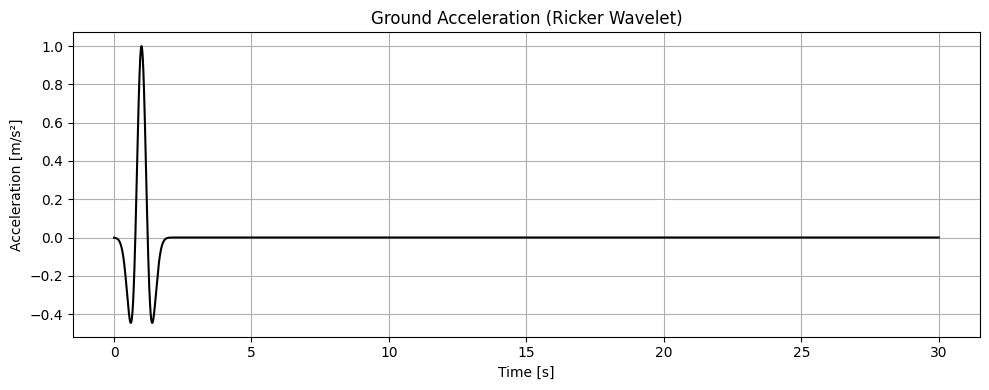

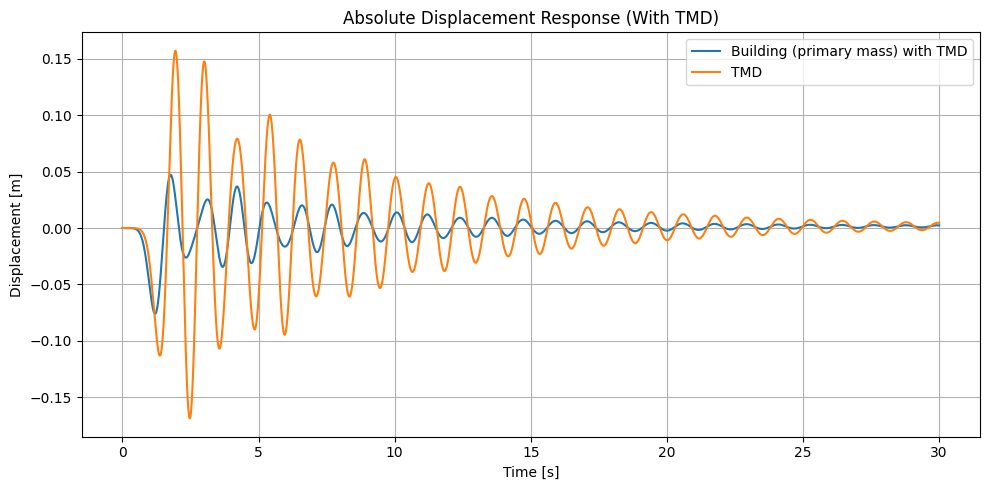

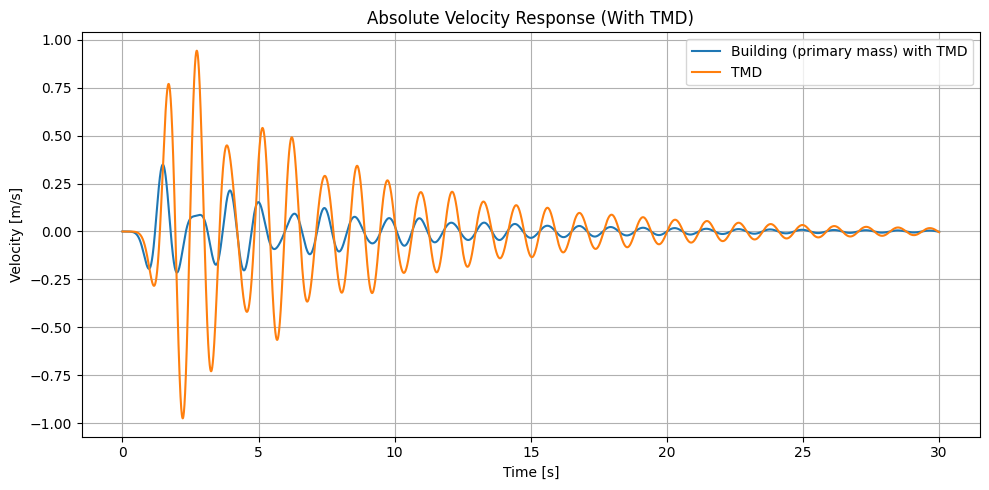

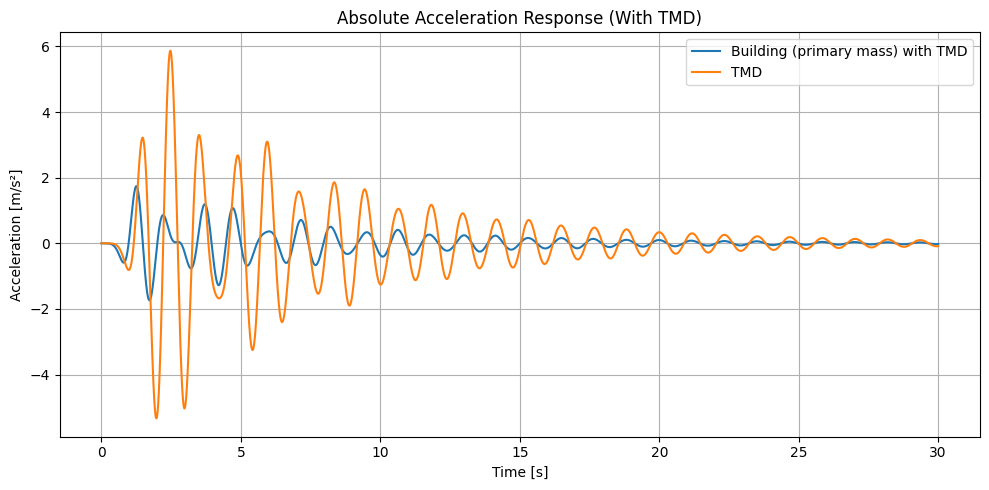

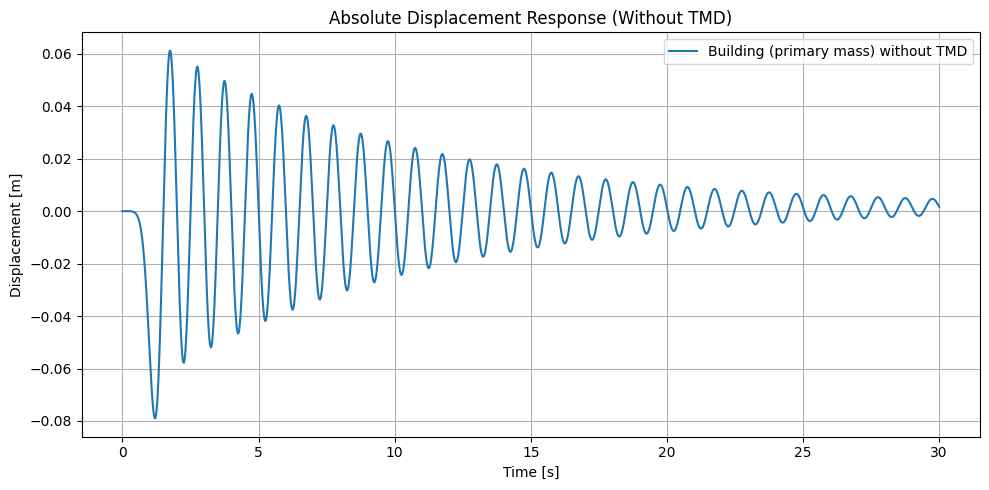

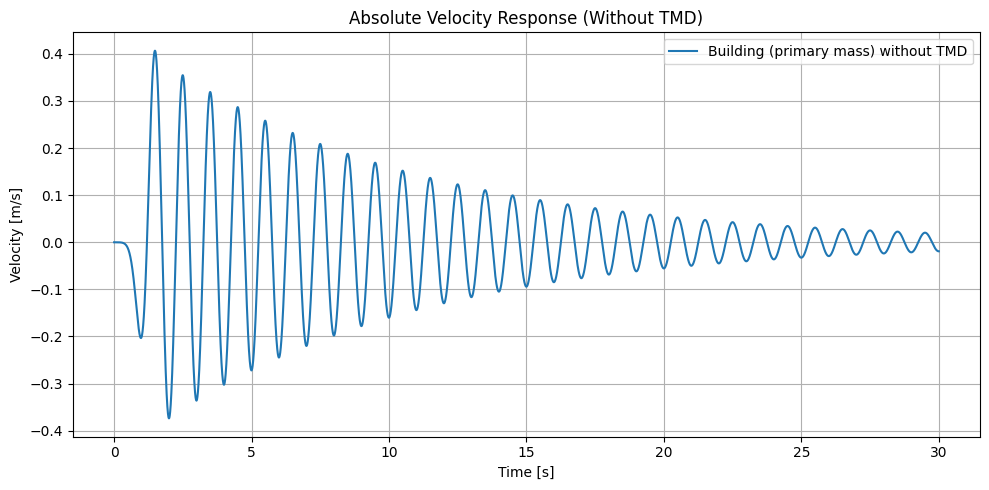

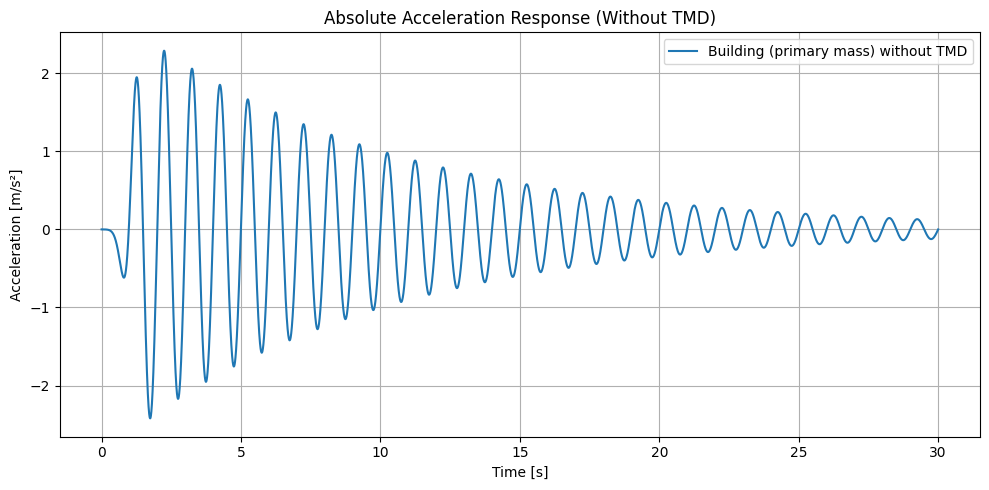

--- Results With TMD ---
Peak Displacement (Building): 0.0761 m
Peak Displacement (TMD):      0.1687 m
Peak Velocity (Building):     0.3484 m/s
Peak Velocity (TMD):          0.9735 m/s
Peak Accel (Building):        1.7415 m/s²
Peak Accel (TMD):             5.8687 m/s²

--- Results Without TMD ---
Peak Displacement (Building): 0.0790 m
Peak Velocity (Building):     0.4066 m/s
Peak Accel (Building):        2.4194 m/s²


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#variables
m1 = 1000.0     # Mass of main structure [kg]
f1 = 1.0        # Natural frequency of building [Hz]
zeta1 = 0.02    # Damping ratio of building


f0 = 1.0        # Dominant frequency of Ricker wavelet [Hz]
A = 1.0         # Peak ground acceleration amplitude [m/s^2]
t_center = 1.0  # Center time of wavelet [s]

dt = 0.002      # Time step [s]
T = 30.0        # Total simulation time [s]

# ==========================================================
# 2. SYSTEM MATRICES (Equation of Motion) - With TMD
# ==========================================================
m2 = 100.00     # Mass TMD [kg]
f2 = 1.0        # Natural frequency of TMD (tuned to f1)
zeta2 = 0.05    # Damping ratio of TMD

omega1 = 2 * np.pi * f1
omega2 = 2 * np.pi * f2

k1 = m1 * omega1**2
k2 = m2 * omega2**2
c1 = 2 * zeta1 * m1 * omega1
c2 = 2 * zeta2 * m2 * omega2

M_tmd = np.array([[m1, 0],
              [0,  m2]])
C_tmd = np.array([[c1 + c2, -c2],
              [-c2,      c2]])
K_tmd = np.array([[k1 + k2, -k2],
              [-k2,      k2]])

# ==========================================================
# 2b. SYSTEM MATRICES (Equation of Motion) - Without TMD
# ==========================================================
M_no_tmd = np.array([[m1]])
C_no_tmd = np.array([[c1]])
K_no_tmd = np.array([[k1]])


# ==========================================================
# 3. GROUND EXCITATION (Ricker wavelet)
# ==========================================================
def ricker(t, f0):
    a = np.pi * f0 * t
    return (1 - 2 * a**2) * np.exp(-a**2)

t = np.arange(0, T + dt, dt)
ag = A * ricker(t - t_center, f0)  # Ground acceleration [m/s^2]

# ==========================================================
# 4. INITIAL CONDITIONS - With TMD
# ==========================================================
r_tmd = np.zeros((len(t), 2))       # Relative displacements
r_dot_tmd = np.zeros((len(t), 2))   # Relative velocities
r_ddot_tmd = np.zeros((len(t), 2))  # Relative accelerations

# Initial acceleration from equilibrium: M r_ddot = -C r_dot - K r - M * 1 * ag
F0_tmd = -M_tmd.dot(np.array([1, 1])) * ag[0]
r_ddot_tmd[0] = np.linalg.solve(M_tmd, F0_tmd - C_tmd @ r_dot_tmd[0] - K_tmd @ r_tmd[0])


# ==========================================================
# 4b. INITIAL CONDITIONS - Without TMD
# ==========================================================
r_no_tmd = np.zeros((len(t), 1))       # Relative displacements
r_dot_no_tmd = np.zeros((len(t), 1))   # Relative velocities
r_ddot_no_tmd = np.zeros((len(t), 1))  # Relative accelerations

# Initial acceleration from equilibrium: M r_ddot = -C r_dot - K r - M * 1 * ag
F0_no_tmd = -M_no_tmd.dot(np.array([1])) * ag[0]
r_ddot_no_tmd[0] = np.linalg.solve(M_no_tmd, F0_no_tmd - C_no_tmd @ r_dot_no_tmd[0] - K_no_tmd @ r_no_tmd[0])


# ==========================================================
# 5. TRAPEZOIDAL RULE FORMULATION
# ==========================================================
# (M + Δt/2*C + Δt^2/4*K) r_ddot_{k+1} = F_{k+1} - C( r_dot_k + Δt/2*r_ddot_k )
#                                       - K( r_k + Δt/2*r_dot_k + Δt^2/4*r_ddot_k )

K_eff_tmd = M_tmd + 0.5 * dt * C_tmd + 0.25 * dt**2 * K_tmd
K_eff_tmd_inv = np.linalg.inv(K_eff_tmd)

K_eff_no_tmd = M_no_tmd + 0.5 * dt * C_no_tmd + 0.25 * dt**2 * K_no_tmd
K_eff_no_tmd_inv = np.linalg.inv(K_eff_no_tmd)

# ==========================================================
# 6. TIME INTEGRATION LOOP - With TMD
# ==========================================================
for k in range(len(t) - 1):
    F_next = -M_tmd.dot(np.array([1, 1])) * ag[k + 1]

    rhs = (F_next
           - C_tmd.dot(r_dot_tmd[k] + 0.5 * dt * r_ddot_tmd[k])
           - K_tmd.dot(r_tmd[k] + 0.5 * dt * r_dot_tmd[k] + 0.25 * dt**2 * r_ddot_tmd[k]))

    r_ddot_tmd[k + 1] = K_eff_tmd_inv.dot(rhs)
    r_dot_tmd[k + 1] = r_dot_tmd[k] + 0.5 * dt * (r_ddot_tmd[k] + r_ddot_tmd[k + 1])
    r_tmd[k + 1] = r_tmd[k] + dt * r_dot_tmd[k] + 0.25 * dt**2 * (r_ddot_tmd[k] + r_ddot_tmd[k + 1])

# ==========================================================
# 6b. TIME INTEGRATION LOOP - Without TMD
# ==========================================================
for k in range(len(t) - 1):
    F_next_no_tmd = -M_no_tmd.dot(np.array([1])) * ag[k + 1]

    rhs_no_tmd = (F_next_no_tmd
           - C_no_tmd.dot(r_dot_no_tmd[k] + 0.5 * dt * r_ddot_no_tmd[k])
           - K_no_tmd.dot(r_no_tmd[k] + 0.5 * dt * r_dot_no_tmd[k] + 0.25 * dt**2 * r_ddot_no_tmd[k]))

    r_ddot_no_tmd[k + 1] = K_eff_no_tmd_inv.dot(rhs_no_tmd)
    r_dot_no_tmd[k + 1] = r_dot_no_tmd[k] + 0.5 * dt * (r_ddot_no_tmd[k] + r_ddot_no_tmd[k + 1])
    r_no_tmd[k + 1] = r_no_tmd[k] + dt * r_dot_no_tmd[k] + 0.25 * dt**2 * (r_ddot_no_tmd[k] + r_ddot_no_tmd[k + 1])


# ==========================================================
# 7. ABSOLUTE MOTION (structure motion + ground) - With TMD
# ==========================================================
vg = np.cumsum(ag) * dt
xg = np.cumsum(vg) * dt

u_tmd = r_tmd + xg.reshape(-1, 1) * np.array([1, 1])
u_dot_tmd = r_dot_tmd + vg.reshape(-1, 1) * np.array([1, 1])
u_ddot_tmd = r_ddot_tmd + ag.reshape(-1, 1) * np.array([1, 1])

# ==========================================================
# 7b. ABSOLUTE MOTION (structure motion + ground) - Without TMD
# ==========================================================
u_no_tmd = r_no_tmd + xg.reshape(-1, 1) * np.array([1])
u_dot_no_tmd = r_dot_no_tmd + vg.reshape(-1, 1) * np.array([1])
u_ddot_no_tmd = r_ddot_no_tmd + ag.reshape(-1, 1) * np.array([1])


# ==========================================================
# 8. PLOTS - With TMD
# ==========================================================
plt.figure(figsize=(10, 4))
plt.plot(t, ag, color='black')
plt.title('Ground Acceleration (Ricker Wavelet)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u_tmd[:, 0], label='Building (primary mass) with TMD')
plt.plot(t, u_tmd[:, 1], label='TMD')
plt.title('Absolute Displacement Response (With TMD)')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u_dot_tmd[:, 0], label='Building (primary mass) with TMD')
plt.plot(t, u_dot_tmd[:, 1], label='TMD')
plt.title('Absolute Velocity Response (With TMD)')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u_ddot_tmd[:, 0], label='Building (primary mass) with TMD')
plt.plot(t, u_ddot_tmd[:, 1], label='TMD')
plt.title('Absolute Acceleration Response (With TMD)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# =========================================================
# 8b. PLOTS - Without TMD
# =========================================================
plt.figure(figsize=(10, 5))
plt.plot(t, u_no_tmd[:, 0], label='Building (primary mass) without TMD')
plt.title('Absolute Displacement Response (Without TMD)')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u_dot_no_tmd[:, 0], label='Building (primary mass) without TMD')
plt.title('Absolute Velocity Response (Without TMD)')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u_ddot_no_tmd[:, 0], label='Building (primary mass) without TMD')
plt.title('Absolute Acceleration Response (Without TMD)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ==========================================================
# 9. SUMMARY OUTPUT - With TMD
# ==========================================================
print("--- Results With TMD ---")
print(f"Peak Displacement (Building): {np.max(np.abs(u_tmd[:,0])):.4f} m")
print(f"Peak Displacement (TMD):      {np.max(np.abs(u_tmd[:,1])):.4f} m")
print(f"Peak Velocity (Building):     {np.max(np.abs(u_dot_tmd[:,0])):.4f} m/s")
print(f"Peak Velocity (TMD):          {np.max(np.abs(u_dot_tmd[:,1])):.4f} m/s")
print(f"Peak Accel (Building):        {np.max(np.abs(u_ddot_tmd[:,0])):.4f} m/s²")
print(f"Peak Accel (TMD):             {np.max(np.abs(u_ddot_tmd[:,1])):.4f} m/s²")

# ==========================================================
# 9b. SUMMARY OUTPUT - Without TMD
# ==========================================================
print("\n--- Results Without TMD ---")
print(f"Peak Displacement (Building): {np.max(np.abs(u_no_tmd[:,0])):.4f} m")
print(f"Peak Velocity (Building):     {np.max(np.abs(u_dot_no_tmd[:,0])):.4f} m/s")
print(f"Peak Accel (Building):        {np.max(np.abs(u_ddot_no_tmd[:,0])):.4f} m/s²")

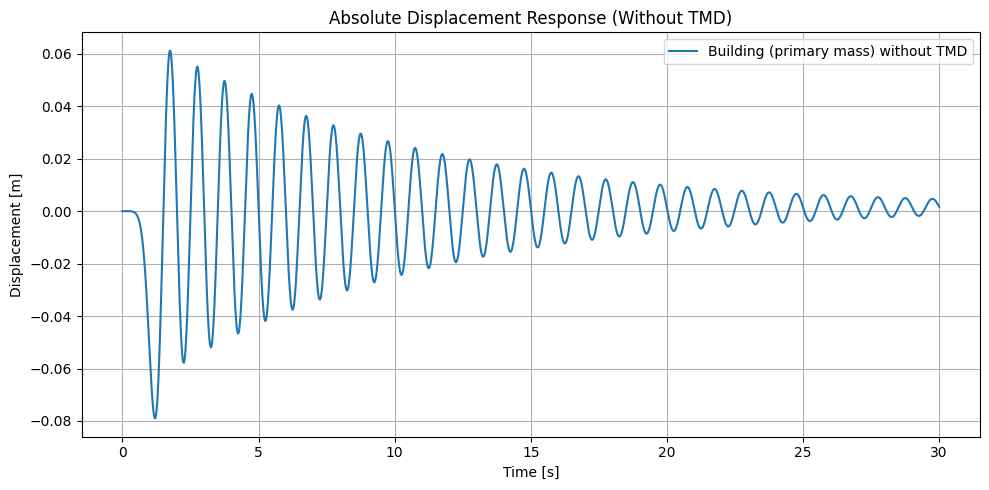

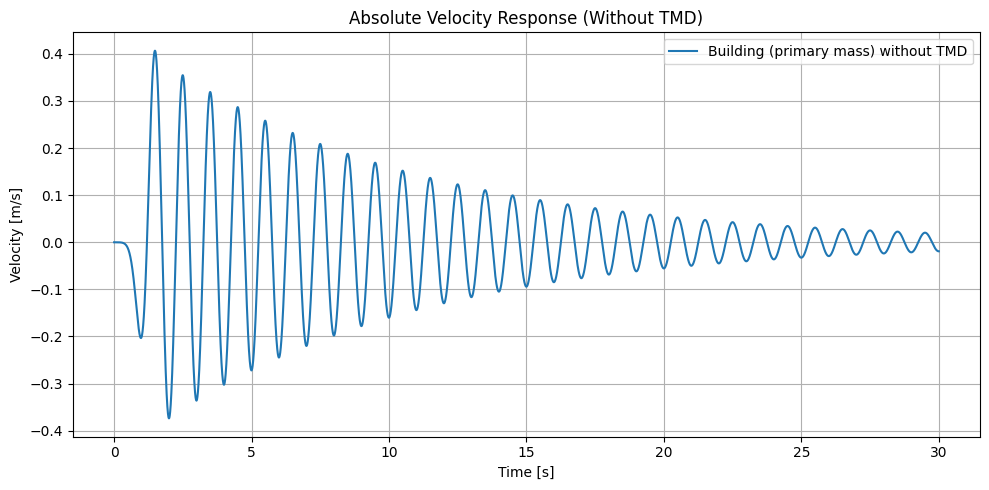

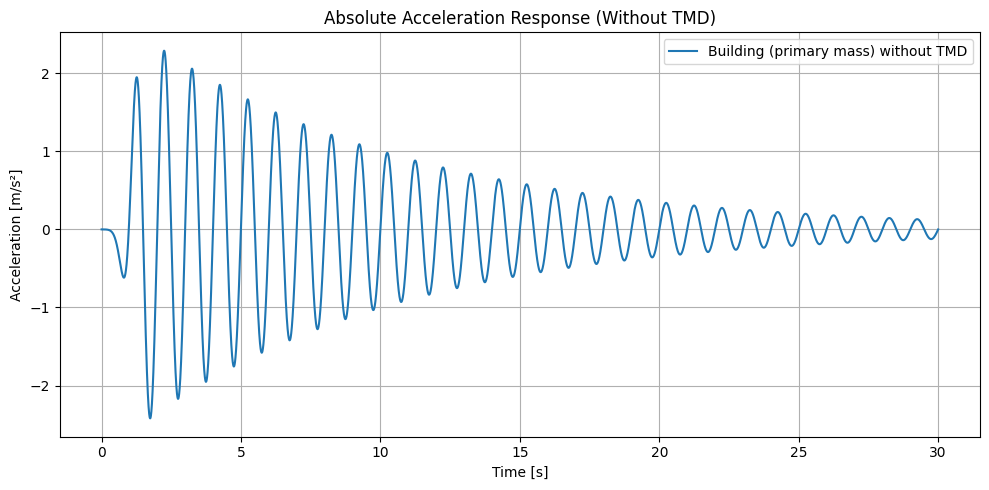

--- Results Without TMD ---
Peak Displacement (Building): 0.0790 m
Peak Velocity (Building):     0.4066 m/s
Peak Accel (Building):        2.4194 m/s²


In [ ]:
# Simulate building without TMD

# Variables (re-defined for clarity in this separate simulation)
m1_no_tmd = 1000.0     # Mass of main structure [kg]
f1_no_tmd = 1.0        # Natural frequency of building [Hz]
zeta1_no_tmd = 0.02    # Damping ratio of building

f0_no_tmd = 1.0        # Dominant frequency of Ricker wavelet [Hz]
A_no_tmd = 1.0         # Peak ground acceleration amplitude [m/s^2]
t_center_no_tmd = 1.0  # Center time of wavelet [s]

dt_no_tmd = 0.002      # Time step [s]
T_no_tmd = 30.0        # Total simulation time [s]

# System Matrices (Equation of Motion) - Without TMD
omega1_no_tmd = 2 * np.pi * f1_no_tmd
k1_no_tmd = m1_no_tmd * omega1_no_tmd**2
c1_no_tmd = 2 * zeta1_no_tmd * m1_no_tmd * omega1_no_tmd

M_no_tmd = np.array([[m1_no_tmd]])
C_no_tmd = np.array([[c1_no_tmd]])
K_no_tmd = np.array([[k1_no_tmd]])

# Ground Excitation (Ricker wavelet) - Using same time vector and ground acceleration
# Assuming t and ag from the previous cell are available. If not, uncomment and run the following:
# t = np.arange(0, T + dt, dt)
# ag = A * ricker(t - t_center, f0) # Need ricker function as well

# Initial Conditions - Without TMD
r_no_tmd = np.zeros((len(t), 1))       # Relative displacements
r_dot_no_tmd = np.zeros((len(t), 1))   # Relative velocities
r_ddot_no_tmd = np.zeros((len(t), 1))  # Relative accelerations

# Initial acceleration from equilibrium: M r_ddot = -C r_dot - K r - M * 1 * ag
F0_no_tmd = -M_no_tmd.dot(np.array([1])) * ag[0]
r_ddot_no_tmd[0] = np.linalg.solve(M_no_tmd, F0_no_tmd - C_no_tmd @ r_dot_no_tmd[0] - K_no_tmd @ r_no_tmd[0])

# Trapezoidal Rule Formulation
K_eff_no_tmd = M_no_tmd + 0.5 * dt_no_tmd * C_no_tmd + 0.25 * dt_no_tmd**2 * K_no_tmd
K_eff_no_tmd_inv = np.linalg.inv(K_eff_no_tmd)

# Time Integration Loop - Without TMD
for k in range(len(t) - 1):
    F_next_no_tmd = -M_no_tmd.dot(np.array([1])) * ag[k + 1]

    rhs_no_tmd = (F_next_no_tmd
           - C_no_tmd.dot(r_dot_no_tmd[k] + 0.5 * dt_no_tmd * r_ddot_no_tmd[k])
           - K_no_tmd.dot(r_no_tmd[k] + 0.5 * dt_no_tmd * r_dot_no_tmd[k] + 0.25 * dt_no_tmd**2 * r_ddot_no_tmd[k]))

    r_ddot_no_tmd[k + 1] = K_eff_no_tmd_inv.dot(rhs_no_tmd)
    r_dot_no_tmd[k + 1] = r_dot_no_tmd[k] + 0.5 * dt_no_tmd * (r_ddot_no_tmd[k] + r_ddot_no_tmd[k + 1])
    r_no_tmd[k + 1] = r_no_tmd[k] + dt_no_tmd * r_dot_no_tmd[k] + 0.25 * dt_no_tmd**2 * (r_ddot_no_tmd[k] + r_ddot_no_tmd[k + 1])

# Absolute Motion (structure motion + ground) - Without TMD
# Assuming vg and xg from the previous cell are available. If not, uncomment and run the following:
# vg = np.cumsum(ag) * dt
# xg = np.cumsum(vg) * dt

u_no_tmd = r_no_tmd + xg.reshape(-1, 1) * np.array([1])
u_dot_no_tmd = r_dot_no_tmd + vg.reshape(-1, 1) * np.array([1])
u_ddot_no_tmd = r_ddot_no_tmd + ag.reshape(-1, 1) * np.array([1])

# Plots - Without TMD
plt.figure(figsize=(10, 5))
plt.plot(t, u_no_tmd[:, 0], label='Building (primary mass) without TMD')
plt.title('Absolute Displacement Response (Without TMD)')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u_dot_no_tmd[:, 0], label='Building (primary mass) without TMD')
plt.title('Absolute Velocity Response (Without TMD)')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, u_ddot_no_tmd[:, 0], label='Building (primary mass) without TMD')
plt.title('Absolute Acceleration Response (Without TMD)')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary Output - Without TMD
print("--- Results Without TMD ---")
print(f"Peak Displacement (Building): {np.max(np.abs(u_no_tmd[:,0])):.4f} m")
print(f"Peak Velocity (Building):     {np.max(np.abs(u_dot_no_tmd[:,0])):.4f} m/s")
print(f"Peak Accel (Building):        {np.max(np.abs(u_ddot_no_tmd[:,0])):.4f} m/s²")

In [ ]:
# Quantify the effectiveness of the TMD

# Peak values from the simulation with TMD (assuming u_tmd, u_dot_tmd, u_ddot_tmd are available from the previous cell)
peak_disp_tmd = np.max(np.abs(u_tmd[:,0]))
peak_vel_tmd = np.max(np.abs(u_dot_tmd[:,0]))
peak_accel_tmd = np.max(np.abs(u_ddot_tmd[:,0]))

# Peak values from the simulation without TMD (assuming u_no_tmd, u_dot_no_tmd, u_ddot_no_tmd are available from the previous cell)
peak_disp_no_tmd = np.max(np.abs(u_no_tmd[:,0]))
peak_vel_no_tmd = np.max(np.abs(u_dot_no_tmd[:,0]))
peak_accel_no_tmd = np.max(np.abs(u_ddot_no_tmd[:,0]))

# Calculate percentage reduction
reduction_disp = ((peak_disp_no_tmd - peak_disp_tmd) / peak_disp_no_tmd) * 100
reduction_vel = ((peak_vel_no_tmd - peak_vel_tmd) / peak_vel_no_tmd) * 100
reduction_accel = ((peak_accel_no_tmd - peak_accel_tmd) / peak_accel_no_tmd) * 100

# Print the results
print("--- TMD Effectiveness ---")
print(f"Peak Displacement Reduction: {reduction_disp:.2f}%")
print(f"Peak Velocity Reduction:     {reduction_vel:.2f}%")
print(f"Peak Acceleration Reduction: {reduction_accel:.2f}%")

--- TMD Effectiveness ---
Peak Displacement Reduction: 3.71%
Peak Velocity Reduction:     14.32%
Peak Acceleration Reduction: 28.02%


In [ ]:
# Summarize and identify the best mass ratio

# Assuming mass_ratios, peak_disp_reductions, peak_vel_reductions,
# and peak_accel_reductions are available from the previous cell's execution.

print("\n--- TMD Effectiveness for Different Mass Ratios ---")
for i, mass_ratio in enumerate(mass_ratios):
    print(f"Mass Ratio {mass_ratio:.2f}:")
    print(f"  Peak Displacement Reduction: {peak_disp_reductions[i]:.2f}%")
    print(f"  Peak Velocity Reduction:     {peak_vel_reductions[i]:.2f}%")
    print(f"  Peak Acceleration Reduction: {peak_accel_reductions[i]:.2f}%")

# Find the mass ratio with the maximum reduction for each metric
best_disp_ratio = mass_ratios[np.argmax(peak_disp_reductions)]
best_vel_ratio = mass_ratios[np.argmax(peak_vel_reductions)]
best_accel_ratio = mass_ratios[np.argmax(peak_accel_reductions)]

print("\n--- Most Effective Mass Ratios ---")
print(f"Most effective mass ratio for Peak Displacement Reduction: {best_disp_ratio:.2f}")
print(f"Most effective mass ratio for Peak Velocity Reduction:     {best_vel_ratio:.2f}")
print(f"Most effective mass ratio for Peak Acceleration Reduction: {best_accel_ratio:.2f}")


--- TMD Effectiveness for Different Mass Ratios ---
Mass Ratio 0.05:
  Peak Displacement Reduction: 1.90%
  Peak Velocity Reduction:     7.44%
  Peak Acceleration Reduction: 15.01%
Mass Ratio 0.10:
  Peak Displacement Reduction: 3.71%
  Peak Velocity Reduction:     14.32%
  Peak Acceleration Reduction: 28.02%
Mass Ratio 0.15:
  Peak Displacement Reduction: 5.44%
  Peak Velocity Reduction:     20.68%
  Peak Acceleration Reduction: 31.87%
Mass Ratio 0.20:
  Peak Displacement Reduction: 7.08%
  Peak Velocity Reduction:     26.57%
  Peak Acceleration Reduction: 35.46%

--- Most Effective Mass Ratios ---
Most effective mass ratio for Peak Displacement Reduction: 0.20
Most effective mass ratio for Peak Velocity Reduction:     0.20
Most effective mass ratio for Peak Acceleration Reduction: 0.20


<Figure size 1200x800 with 0 Axes>

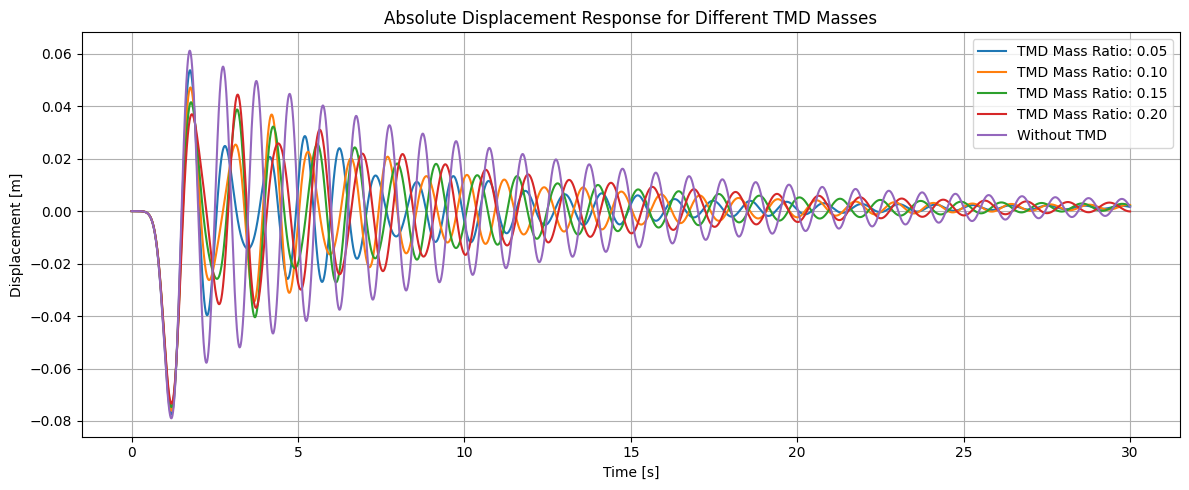

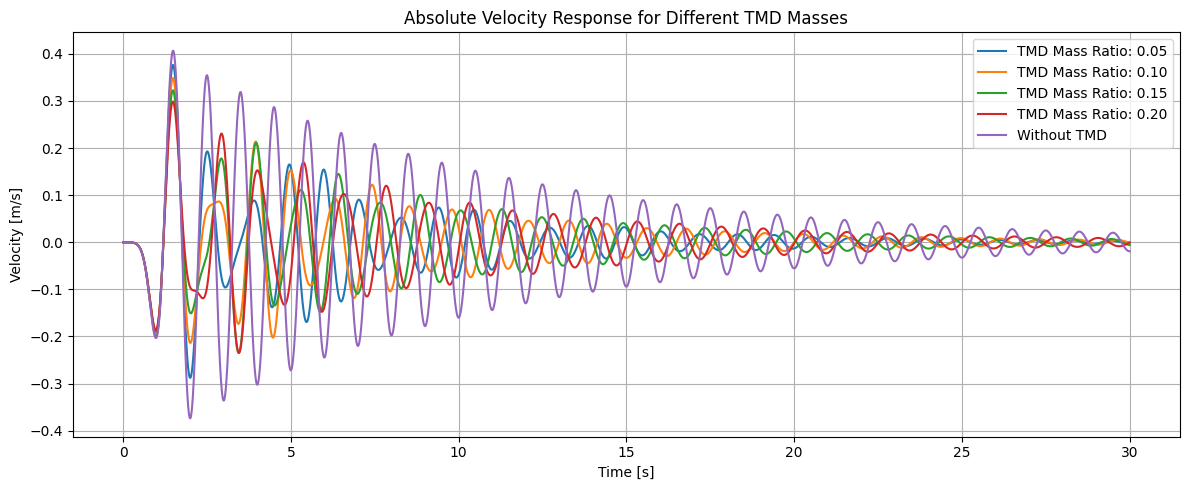

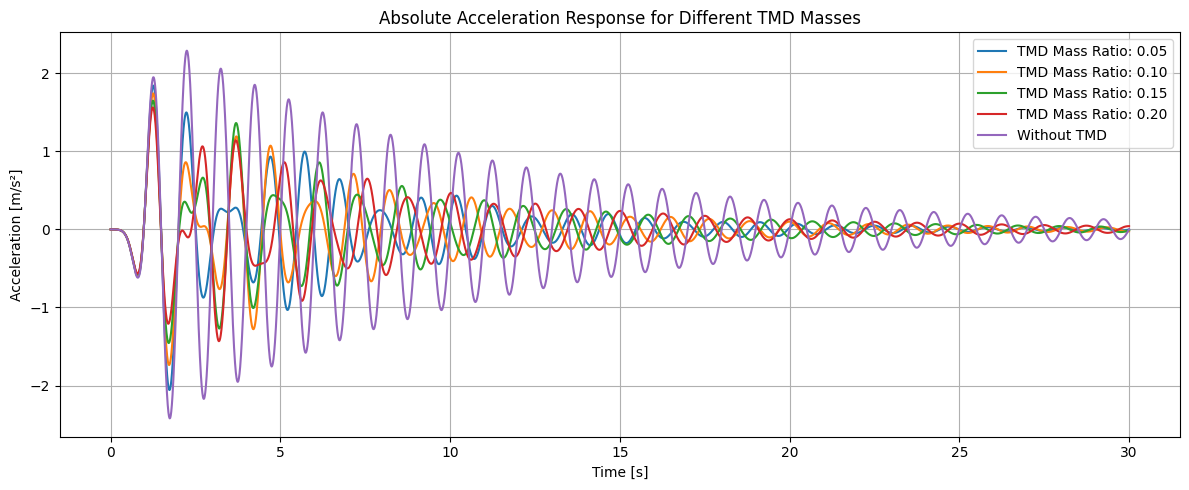

In [ ]:
# Explore the effect of different TMD masses

# Define a range of TMD mass ratios (mass of TMD / mass of building)
mass_ratios = [0.05, 0.10, 0.15, 0.20, 0.25] # Example mass ratios

plt.figure(figsize=(12, 8))

# Lists to store results for plotting
all_u_tmd = []
all_u_dot_tmd = []
all_u_ddot_tmd = []
labels = []

# Lists to store peak reductions for each mass ratio
peak_disp_reductions = []
peak_vel_reductions = []
peak_accel_reductions = []


for mass_ratio in mass_ratios:
    m2_vary = m1 * mass_ratio  # Varying TMD mass
    f2_vary = f1              # Keep TMD frequency tuned to building frequency
    zeta2_vary = zeta2        # Keep TMD damping ratio constant

    # Recalculate system matrices with varying TMD mass
    omega2_vary = 2 * np.pi * f2_vary
    k2_vary = m2_vary * omega2_vary**2
    c2_vary = 2 * zeta2_vary * m2_vary * omega2_vary

    M_tmd_vary = np.array([[m1, 0],
                       [0,  m2_vary]])
    C_tmd_vary = np.array([[c1 + c2_vary, -c2_vary],
                       [-c2_vary,      c2_vary]])
    K_tmd_vary = np.array([[k1 + k2_vary, -k2_vary],
                       [-k2_vary,      k2_vary]])

    # Initial Conditions - With varying TMD
    r_tmd_vary = np.zeros((len(t), 2))       # Relative displacements
    r_dot_tmd_vary = np.zeros((len(t), 2))   # Relative velocities
    r_ddot_tmd_vary = np.zeros((len(t), 2))  # Relative accelerations

    F0_tmd_vary = -M_tmd_vary.dot(np.array([1, 1])) * ag[0]
    r_ddot_tmd_vary[0] = np.linalg.solve(M_tmd_vary, F0_tmd_vary - C_tmd_vary @ r_dot_tmd_vary[0] - K_tmd_vary @ r_tmd_vary[0])

    # Trapezoidal Rule Formulation
    K_eff_tmd_vary = M_tmd_vary + 0.5 * dt * C_tmd_vary + 0.25 * dt**2 * K_tmd_vary
    K_eff_tmd_vary_inv = np.linalg.inv(K_eff_tmd_vary)

    # Time Integration Loop - With varying TMD
    for k in range(len(t) - 1):
        F_next_vary = -M_tmd_vary.dot(np.array([1, 1])) * ag[k + 1]

        rhs_vary = (F_next_vary
               - C_tmd_vary.dot(r_dot_tmd_vary[k] + 0.5 * dt * r_ddot_tmd_vary[k])
               - K_tmd_vary.dot(r_tmd_vary[k] + 0.5 * dt * r_dot_tmd_vary[k] + 0.25 * dt**2 * r_ddot_tmd_vary[k]))

        r_ddot_tmd_vary[k + 1] = K_eff_tmd_vary_inv.dot(rhs_vary)
        r_dot_tmd_vary[k + 1] = r_dot_tmd_vary[k] + 0.5 * dt * (r_ddot_tmd_vary[k] + r_ddot_tmd_vary[k + 1])
        r_tmd_vary[k + 1] = r_tmd_vary[k] + dt * r_dot_tmd_vary[k] + 0.25 * dt**2 * (r_ddot_tmd_vary[k] + r_ddot_tmd_vary[k + 1])

    # Absolute Motion - Building response
    u_tmd_vary = r_tmd_vary + xg.reshape(-1, 1) * np.array([1, 1])
    u_dot_tmd_vary = r_dot_tmd_vary + vg.reshape(-1, 1) * np.array([1, 1])
    u_ddot_tmd_vary = r_ddot_tmd_vary + ag.reshape(-1, 1) * np.array([1, 1])


    all_u_tmd.append(u_tmd_vary[:, 0])
    all_u_dot_tmd.append(u_dot_tmd_vary[:, 0])
    all_u_ddot_tmd.append(u_ddot_tmd_vary[:, 0])
    labels.append(f'TMD Mass Ratio: {mass_ratio:.2f}')

    # Calculate peak reductions for the current mass ratio
    peak_disp_tmd_vary = np.max(np.abs(u_tmd_vary[:,0]))
    peak_vel_tmd_vary = np.max(np.abs(u_dot_tmd_vary[:,0]))
    peak_accel_tmd_vary = np.max(np.abs(u_ddot_tmd_vary[:,0]))

    reduction_disp_vary = ((peak_disp_no_tmd - peak_disp_tmd_vary) / peak_disp_no_tmd) * 100
    reduction_vel_vary = ((peak_vel_no_tmd - peak_vel_tmd_vary) / peak_vel_no_tmd) * 100
    reduction_accel_vary = ((peak_accel_no_tmd - peak_accel_tmd_vary) / peak_accel_no_tmd) * 100

    peak_disp_reductions.append(reduction_disp_vary)
    peak_vel_reductions.append(reduction_vel_vary)
    peak_accel_reductions.append(reduction_accel_vary)


# Add the case without TMD for comparison
all_u_tmd.append(u_no_tmd[:, 0])
all_u_dot_tmd.append(u_dot_no_tmd[:, 0])
all_u_ddot_tmd.append(u_ddot_no_tmd[:, 0])
labels.append('Without TMD')


# Plotting Displacement
plt.figure(figsize=(12, 5))
for i in range(len(all_u_tmd)):
    plt.plot(t, all_u_tmd[i], label=labels[i])
plt.title('Absolute Displacement Response for Different TMD Masses')
plt.xlabel('Time [s]')
plt.ylabel('Displacement [m]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotting Velocity
plt.figure(figsize=(12, 5))
for i in range(len(all_u_dot_tmd)):
    plt.plot(t, all_u_dot_tmd[i], label=labels[i])
plt.title('Absolute Velocity Response for Different TMD Masses')
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting Acceleration
plt.figure(figsize=(12, 5))
for i in range(len(all_u_ddot_tmd)):
    plt.plot(t, all_u_ddot_tmd[i], label=labels[i])
plt.title('Absolute Acceleration Response for Different TMD Masses')
plt.xlabel('Time [s]')
plt.ylabel('Acceleration [m/s²]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()